<a href="https://colab.research.google.com/github/katerinaoleynikova/HSE_riboSEQ/blob/main/NGS_HW5__Riboseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NGS / HW5 - Ribo-Seq analysis

Ribosome profiling, or Ribo-Seq (also named ribosome footprinting), is an adaptation of a technique developed by Joan Steitz and Marilyn Kozak almost 50 years ago that Nicholas Ingolia and Jonathan Weissman adapted to work with next generation sequencing that uses specialized messenger RNA (mRNA) sequencing to determine which mRNAs are being actively translated.

Ribosome profiling in brief:

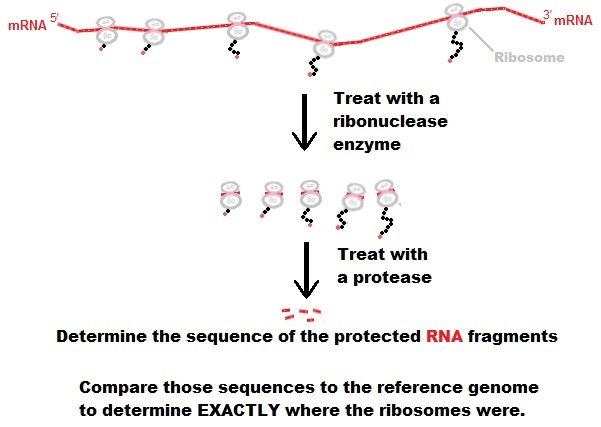

Retrieved from: https://en.wikipedia.org/wiki/Ribosome_profiling

**Task 1** - Determination of differential expression.

The archive contains the file 01. RiboSeq_RNASeq_HCC_counts.tsv, which contains a matrix of counts of the results of Ribo-Seq and RNA-Seq experiments in patients with hepatocellular carcinoma. The count matrix was obtained by the standard STAR workflow. For each patient there are 4 columns in the table (RNA-Seq norms and tumors, Ribo-Seq norms and tumors), written as 'sample_number-tissue_type-experiment'.

**Data retrieval and preprocessing**

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [5]:
!cp gdrive/MyDrive/colabdrive/riboseq/* . && ls *zip

HSE_RiboSeq_HT.zip


In [ ]:
!unzip HSE_RiboSeq_HT.zip

In [7]:
!cd HSE_RiboSeq_HT/ && ls

'01. RiboSeq_RNASeq_HCC_counts.tsv'  '02. RiboSeq_EColi_track_r.wig'
'02. RiboSeq_EColi_track_f.wig'


In [ ]:
# Reading dataset 
import pandas as pd

counts = pd.read_csv('HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv', index_col=0, sep='\t')
counts.head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,NaN
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0


In [ ]:
genes = list(counts['geneSymbol']) # create list of genes

In [ ]:
counts = counts.fillna(0) # to fill na values w/ 0

In [ ]:
# get two dfs: RNA, RPF
rpfs = counts[[column for column in counts.columns if column.endswith('RPF')]]
rnas = counts[[column for column in counts.columns if column.endswith('RNA')]]

In [ ]:
rpfs.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61


In [ ]:
rnas.head()

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857.0
ENSG00000000005.5,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0
ENSG00000000419.12,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83.0
ENSG00000000457.13,60,106,70,156,77,67,78,68,97,128,76,185,114,74,127,176,55,261,68,176.0
ENSG00000000460.16,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58.0


1. For each gene, find the correlation coefficient of the counts number between the RNA-Seq and Ribo-Seq experiments. Which correlation better to choose — Pearson or Spearman? 

p.s. Please note that you are not looking at the library's depth-normalized counts, take this into account while doing analysis.
_________________________

Because the data are not normalized, I will choose Spearman correlation coef. evaluation.

hints: https://stats.stackexchange.com/questions/423291/should-i-use-normalized-data-for-correlation-calculation-or-not.

In [ ]:
from scipy.stats import spearmanr
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
import numpy as np

spearman_coefs = np.array([spearmanr(rpfs_row, rnas_row).correlation for (_, rpfs_row), (_, rnas_row) in zip(rpfs.iterrows(), rnas.iterrows())])
spearman_coefs

array([        nan, -0.13942446,  0.84962406, ...,         nan,
               nan,  0.44372423])

2. Create a histogram of the correlation coefs distribution. What genes have the highest correlation and which ones have the lowest one? How can you explain this?

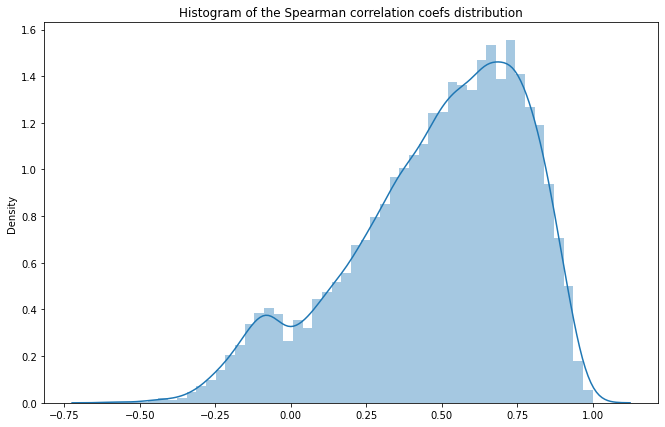

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,7))
sns.distplot(spearman_coefs)
plt.title('Histogram of the Spearman correlation coefs distribution')
plt.show()

In [ ]:
counts['spearman_coefs_absolute_values'] = np.abs(spearman_coefs)
counts.head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,spearman_coefs_absolute_values
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,0,...,457,0,0,200,889,0,0,161,857.0,NaN
ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.0,0.139424
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,325,...,170,109,357,60,244,141,173,56,83.0,0.849624
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,130,...,176,67,176,55,261,64,100,68,176.0,0.697779
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,44,...,437,7,167,34,201,6,61,9,58.0,0.811583


In [ ]:
counts = counts.sort_values('spearman_coefs_absolute_values', ascending=False)
counts.head(15)

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,spearman_coefs_absolute_values
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000176746.6,MAGEB6,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000229972.7,IQCF3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000143105.6,KCNA10,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000223614.5,ZNF735,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000176040.13,TMPRSS7,0,0,0,0,6,0,2,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000156575.2,PRG3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000124935.3,SCGB1D2,0,0,0,0,0,0,0,0,0,...,48,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000215274.5,GAGE10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000
ENSG00000176979.12,TRIM60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.000000


The first 12 genes from the df have a huge amount of zeros in columns; therefore, they are represented as highly correlated.

In [ ]:
counts.tail()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,spearman_coefs_absolute_values
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000282872.1,RP11-96L14.8,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0.0,NaN
ENSG00000282883.1,AKR1C3,0,5,0,0,0,1,0,0,0,...,0,0,13,0,0,0,11,0,0.0,NaN
ENSG00000282939.1,TRBV7-2,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,NaN
ENSG00000283039.1,KLF18,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0.0,NaN
ENSG00000283063.1,TRBV6-2,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,NaN


The tail of this df (the genes w/ the lowest expression) have NaN in the column w/ |spearman cor. coef. value|.. this is the reason (I think so) 🐸

3. Analyze the distribution of Ribo-seq counts: plot the dependence of the variance on the mean. Does this look like an NB distribution? If not, what does it look like? If so, what statistical tests can be used to confirm that you have an NB distribution in front of you?

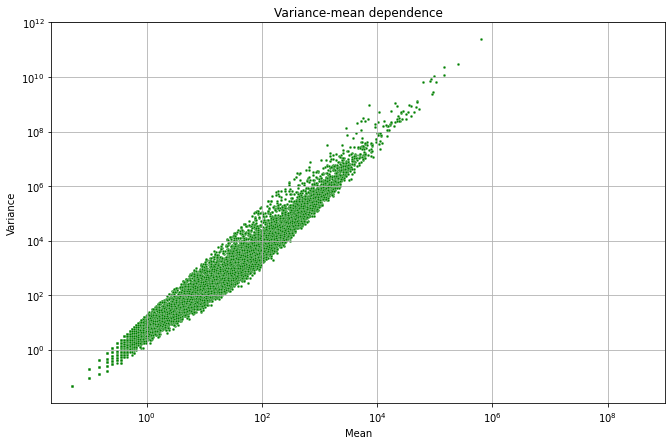

In [ ]:
variance = np.var(rpfs, axis = 1) # compute the variance along the specified axis.
mean = np.mean(rpfs, axis = 1) # compute the mean along the specified axis.
mean = mean[variance > 0] 
variance = variance[variance > 0]

fig, ax = plt.subplots(figsize=(11,7))
sns.scatterplot(x=mean, y=variance, color='green', ax=ax, s=7)

ax.set_xlabel('Mean'); ax.set_ylabel('Variance')
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim(0, 10e8); ax.set_ylim(0, 10e11)
plt.title('Variance-mean dependence')
plt.grid()

plt.show()

It seems it looks like NB distribution (it is similar w/ the last plot from the article https://www.researchgate.net/figure/Comparison-of-normal-negative-binomial-and-log-normal-distribution-in-fitting_fig2_355443665).

We can interpret the Negative Binomial Distribution as a generalization of the Poisson distribution. If the distribution is in fact Poission, we will see more dots close to 1. This makes sense because as a point approaches 1, the variance approaches the mean. When a point is smaller than one, the variance is higher than that of a Poisson distribution with the same mean, so we can see that the Negative Binomial distribution generalizes Poisson by increasing the variance.

Inf. was retrived from https://stats.stackexchange.com/questions/585330/why-does-my-poisson-glm-with-identity-link-converge-but-a-negative-binomial-glm

In [ ]:
import statsmodels.api as sm

y = np.log(variance+1)
X = np.log(mean+1)

# Negative Binomial
nbReg = sm.GLM(y, X, family = sm.families.NegativeBinomial(link = sm.families.links.identity)).fit()
nbReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                17349
Model:                            GLM   Df Residuals:                    17348
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47675.
Date:                Tue, 27 Dec 2022   Deviance:                       494.45
Time:                        03:09:22   Pearson chi2:                     590.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0296      0.017    117.046      0.000       1.996       2.064
==============================================================================
"""

In [ ]:
# Poisson
poiReg = sm.GLM(y, X, family = sm.families.Poisson(link = sm.families.links.identity)).fit()
poiReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                17349
Model:                            GLM   Df Residuals:                    17348
Model Family:                 Poisson   Df Model:                            0
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31280.
Date:                Tue, 27 Dec 2022   Deviance:                       2179.0
Time:                        03:10:22   Pearson chi2:                 2.43e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9414      0.006    339.137      0.000       1.930       1.953
==============================================================================
"""

Log-Likelihood for NB less than for Poisson -> this is NB distribution.

p.s. proof is here https://www.statology.org/negative-binomial-vs-poisson/.

3. Find differentially expressed RNA-Seq genes between norm and tumor. To do this, you can use DESeq2 or edgeR (there is a Python wrapper for DESeq). Build a volcano plot. Do the same for the Ribo-Seq experiment. Do the results of differential expression coincide? Which genes were significantly different in expression in one case, and which in the other? Perform a similar analysis, only with the search for genes with a difference in translation efficiency (~ method + condition + method:condition). What do you say about the set of genes that you obtained by this method? Support the conclusions with graphs.

**Create design df for dif expression analysis**

In [ ]:
counts = pd.read_csv('HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')
genes = list(counts['geneSymbol'])
del counts['geneID'], counts['geneSymbol']
counts = counts.fillna(0)

counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
4,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17.0
18941,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40.0
18942,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,0,9,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
counts.to_csv('counts.csv', index=False) # and open it in R studio

In [ ]:
# design matrix
design = pd.DataFrame({
    'condition': [sample_name.split("-")[1] for sample_name in counts.columns],
    'experiment': [sample_name.split("-")[2] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

,condition,experiment
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RPF,normal,RPF


In [ ]:
design.to_csv('design.csv', index=False) # and open it in R studio w/ input counts df

**R part**

Here just some images retrieved from analysis (see .r script for dif. expression analysis).

Below QC plot is shown.

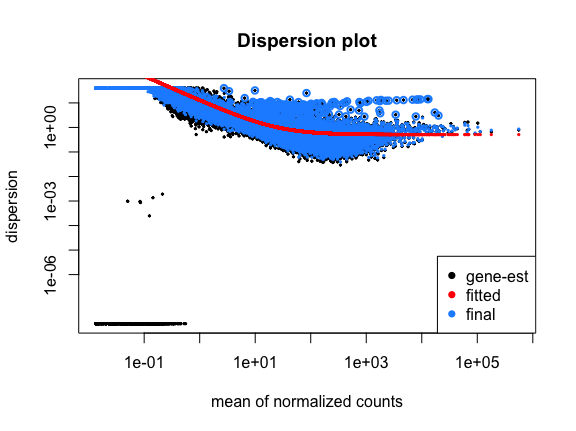

In general we're most interested in logs of the counts; DESeq has a regularlized log transform built in. So, it was performed and hist. was plotted:

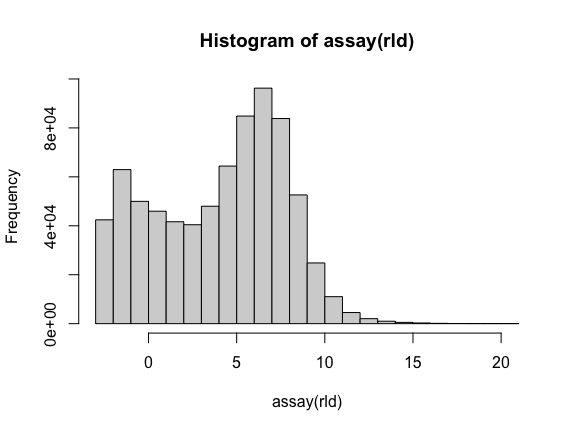

PCA:

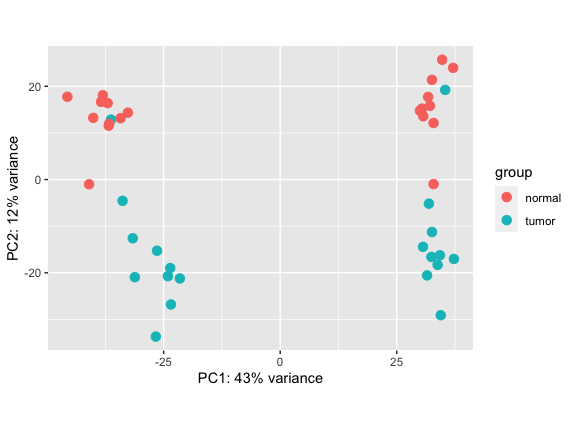

The case/control samples seem very clearly distinguished in the first principal component.

**Differential Expression Analysis in R by DESeq2**

Now we perform the differential expression analysis using DESeq2's built in methods.

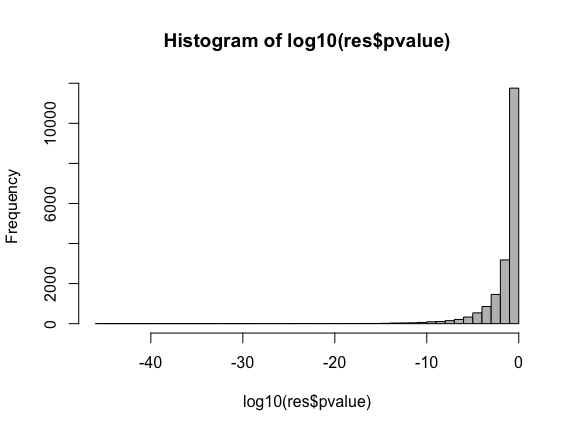

As we can see, there's a substantial number of genes with extremely small p-values.

MA plot

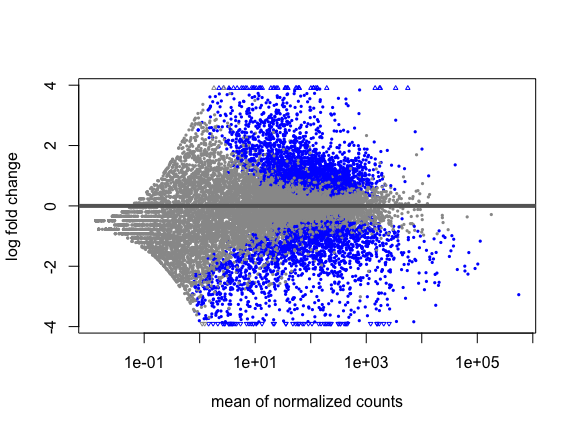

Volcano Plot

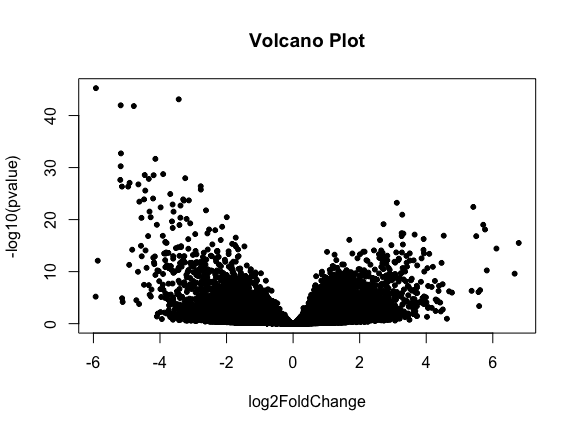

Something happened w/ colors.. 😿

**Task 2** - Wig-file analysis.

The archive contains two files with .wig tracks of the Ribo-Seq experiment of E. coli: '02. RiboSeq_EColi_track_f.wig' and '02. RiboSeq_EColi_track_r.wig' for forward and reverse chains, respectively. 

These tracks were obtained as it follows: QC (quality control), the adapters were trimming, and the resulting clean reads were mapped to the _Escherichia coli_ genome.

Then each genomic position was assigned values corresponding to the number of 3’-ends of readings; an offset was determined to find the P-site, after which the values adjusted for this offset were recorded in a .wig file. 

The reference genome used during the processing of readings is U00096.3. To complete the tasks, we need his annotation (can find it in GenBank).

p.s. annotation file was retrieved from https://www.ncbi.nlm.nih.gov/nuccore/U00096.3/.

In [ ]:
!pip install wiggelen # Wiggelen is a Python library for working with wiggle tracks (WIG files).

In [9]:
import wiggelen 

Coverage intervals:

In [11]:
import wiggelen 
from wiggelen import intervals 

regions = []
begins = []
ends = []
for region, begin, end in intervals.coverage(wiggelen.walk(open('HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig'))):
  regions.append(region)
  begins.append(begin)
  ends.append(end)

In [13]:
import pandas as pd 

df1 = pd.DataFrame(list(zip(regions, begins, ends)),
               columns =['region', 'begin', 'end'])
df1

,region,begin,end
0,U00096.3,40,40
1,U00096.3,77,77
2,U00096.3,85,85
3,U00096.3,139,139
4,U00096.3,147,147
...,...,...,...
242865,U00096.3,4641614,4641614
242866,U00096.3,4641620,4641622
242867,U00096.3,4641624,4641626
242868,U00096.3,4641634,4641634


In [14]:
regions = []
begins = []
ends = []
for region, begin, end in intervals.coverage(wiggelen.walk(open('HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig'))):
  regions.append(region)
  begins.append(begin)
  ends.append(end)

In [15]:
import pandas as pd 

df2 = pd.DataFrame(list(zip(regions, begins, ends)),
               columns =['region', 'begin', 'end'])
df2

,region,begin,end
0,U00096.3,585,585
1,U00096.3,1212,1212
2,U00096.3,1292,1292
3,U00096.3,3626,3626
4,U00096.3,3979,3979
...,...,...,...
249517,U00096.3,4641358,4641358
249518,U00096.3,4641368,4641368
249519,U00096.3,4641372,4641372
249520,U00096.3,4641459,4641459


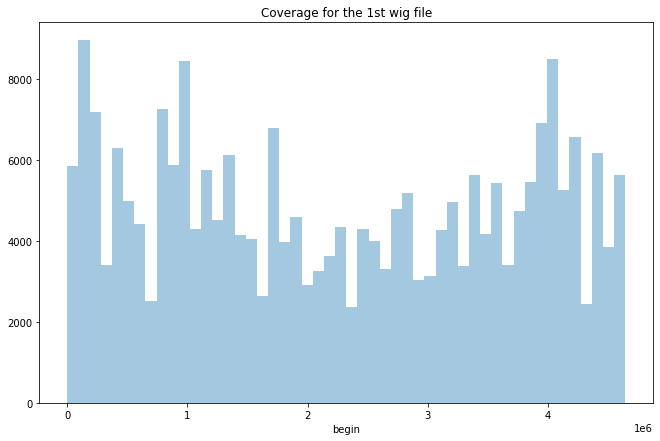

In [19]:
plt.figure(figsize=(11,7))
sns.distplot(df1.begin, kde=False)
plt.title('Coverage for the 1st wig file')
plt.show()

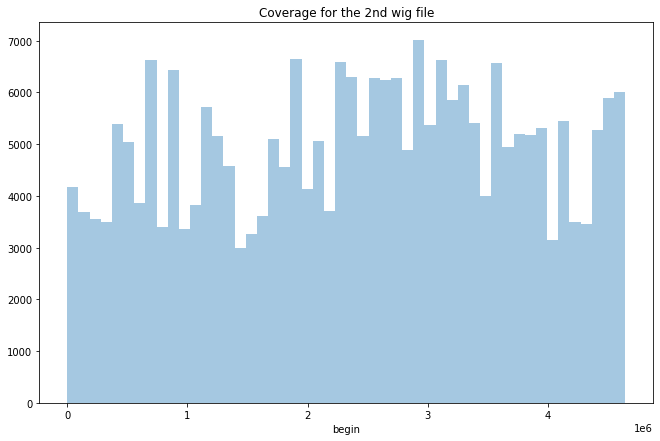

In [20]:
plt.figure(figsize=(11,7))
sns.distplot(df2.begin, kde=False)
plt.title('Coverage for the 2nd wig file')
plt.show()

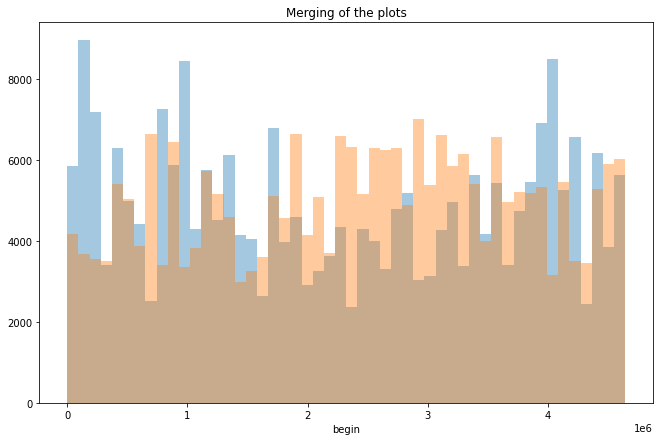

In [26]:
fig, ax = plt.subplots(figsize=(11,7))
for a in [df1.begin, df2.begin]:
    sns.distplot(a, ax=ax, kde=False)
plt.title('Merging of the plots')
plt.show()

Is there any unevenness in the genome coverage?

R: I think so..

Calculate the RPKM and TPM values.

_________________

RPKM (Reads Per Kilobase Million), TPM (Transcripts Per Kilobase Million).

According to https://www.seqanswers.com/forum/bioinformatics/bioinformatics-aa/29976-the-easiest-fastest-way-to-get-from-bam-to-tpm-or-rpkm:

In [32]:
print(df1.shape[0]/1_000_000, df2.shape[0]/1_000_000)

0.24287 0.249522


we should multiply each wiggle by this (1 for df1, 2 for df2) value:

In [33]:
df1['val'] = df1['begin'].apply(lambda x: x*0.24287)

In [34]:
df1.head()

,region,begin,end,val
0,U00096.3,40,40,9.71480
1,U00096.3,77,77,18.70099
2,U00096.3,85,85,20.64395
3,U00096.3,139,139,33.75893
4,U00096.3,147,147,35.70189


In [35]:
df2['val'] = df2['begin'].apply(lambda x: x*0.249522)

In [36]:
df2.head()

,region,begin,end,val
0,U00096.3,585,585,145.970370
1,U00096.3,1212,1212,302.420664
2,U00096.3,1292,1292,322.382424
3,U00096.3,3626,3626,904.766772
4,U00096.3,3979,3979,992.848038
